<a href="https://colab.research.google.com/github/calrose/FinalDM/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

### Load Data

In [46]:
df = pd.read_csv("/content/NewData.csv")


### Data Exploration

In [47]:
# view first 5 rows of the dataset
df.head()

,Unnamed: 0,Unnamed,file,message,label
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0
3,3,4,allen-p/all_documents/260.,Message-ID: <14437034.1075855671174.JavaMail.e...,0.0
4,4,5,arnold-j/deleted_items/702.,Message-ID: <21959484.1075861667058.JavaMail.e...,0.0


In [4]:
# get shape of the data
df.shape

(94592, 12)

In [48]:
# a sample email
print(df.loc[1]['message'])

Message-ID: <7027882.1075858635275.JavaMail.evans@thyme>
Date: Wed, 24 Oct 2001 21:45:42 -0700 (PDT)
From: book-news@amazon.com
To: pallen@enron.com
Subject: Save 30% on "How People Grow : What the Bible Reveals About
 Personal Growth" by Henry Cloud
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: "Amazon.com" <book-news@amazon.com>@ENRON
X-To: pallen@enron.com
X-cc: 
X-bcc: 
X-Folder: \PALLEN (Non-Privileged)\Allen, Phillip K.\Deleted Items
X-Origin: Allen-P
X-FileName: PALLEN (Non-Privileged).pst


[IMAGE] =09


    Search   BooksAll Products  for         Dear Amazon.com Customer,  As s=
omeone who has purchased books by Henry Cloud in the past, you might  like =
to know that How People Grow : What the Bible Reveals About  Personal Growt=
h is now available.  You can order your copy at a savings  of 30% by follow=
ing the link below.      [IMAGE]  How  People Grow : What the Bible Reveals=
 About Personal Growth  List P

In [49]:
# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

[('Message-ID', '<7027882.1075858635275.JavaMail.evans@thyme>'),
 ('Date', 'Wed, 24 Oct 2001 21:45:42 -0700 (PDT)'),
 ('From', 'book-news@amazon.com'),
 ('To', 'pallen@enron.com'),
 ('Subject',
  'Save 30% on "How People Grow : What the Bible Reveals About\r\n Personal Growth" by Henry Cloud'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', 'quoted-printable'),
 ('X-From', '"Amazon.com" <book-news@amazon.com>@ENRON'),
 ('X-To', 'pallen@enron.com'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\PALLEN (Non-Privileged)\\Allen, Phillip K.\\Deleted Items'),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'PALLEN (Non-Privileged).pst')]

In [50]:
# get date
e.get('Date')

'Wed, 24 Oct 2001 21:45:42 -0700 (PDT)'

In [51]:
# show message body
e.get_payload()

'\r\n[IMAGE] =09\r\n\r\n\r\n    Search   BooksAll Products  for         Dear Amazon.com Customer,  As s=\r\nomeone who has purchased books by Henry Cloud in the past, you might  like =\r\nto know that How People Grow : What the Bible Reveals About  Personal Growt=\r\nh is now available.  You can order your copy at a savings  of 30% by follow=\r\ning the link below.      [IMAGE]  How  People Grow : What the Bible Reveals=\r\n About Personal Growth  List Price:  $19.99  Our Price: $13.99  You Save: $=\r\n6.00  (30%)    [IMAGE]   Amazon.com Whether you\'re hoping to achieve person=\r\nal and spiritual growth or are  looking for guidance to help others, you\'ll=\r\n find practical and proven  wisdom in Drs. Henry Cloud and John Townsend\'s =\r\nHow People Grow: What the  Bible Reveals About Personal Growth. Starting wi=\r\nth the premise that all  growth is spiritual growth, the authors then expou=\r\nnd on the concept. Cloud  postulates that we spend too much time focusing o=\r\nn problem

### Extract headers

In [52]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [53]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea..."
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner


### Extract Message Body

In [54]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...


### Employee Names

In [55]:
df['file'][:10]

0    badeer-r/discussion_threads/212.
1          allen-p/deleted_items/189.
2         arnold-j/all_documents/331.
3          allen-p/all_documents/260.
4         arnold-j/deleted_items/702.
5            arnold-j/_sent_mail/478.
6         arnold-j/all_documents/168.
7            arnold-j/sent_items/300.
8          allen-p/deleted_items/381.
9          allen-p/deleted_items/353.
Name: file, dtype: object

In [56]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...,arnold-j


### Look into X-Folder

In [57]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  10000
number of unique folders:  125


In [58]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",688
1,"\JARNOLD (Non-Privileged)\Arnold, John\Sent Items",679
2,\John_Arnold_Jun2001\Notes Folders\All documents,464
3,\John_Arnold_Dec2000\Notes Folders\All documents,438
4,\John_Arnold_Jun2001\Notes Folders\Sent,420
5,\John_Arnold_Jun2001\Notes Folders\'sent mail,420
6,\John_Arnold_Dec2000\Notes Folders\Sent,394
7,\John_Arnold_Dec2000\Notes Folders\'sent mail,394
8,\Phillip_Allen_Dec2000\Notes Folders\All docum...,353
9,"\Susan_Bailey_Mar2002\Bailey, Susan\Deleted Items",348


### Visualize top 20 folders

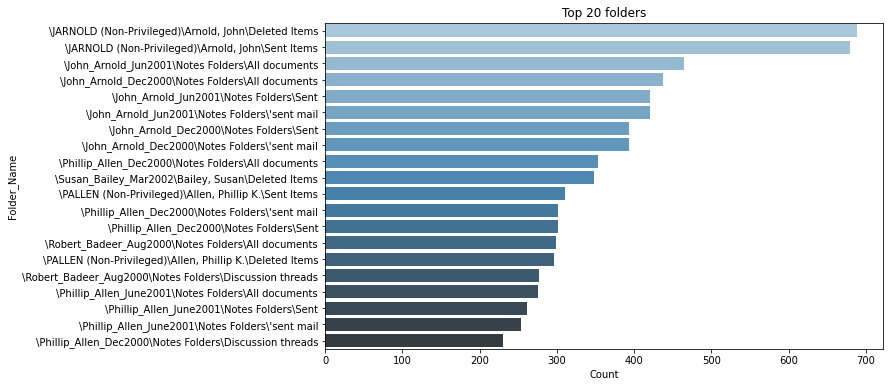

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

**Let's see top 20 highest email sender employee**

In [61]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,arnold-j,4898
1,allen-p,3034
2,badeer-r,877
3,arora-h,654
4,bailey-s,478
5,bass-e,59


**Visualize top 20 highest email sender employees**

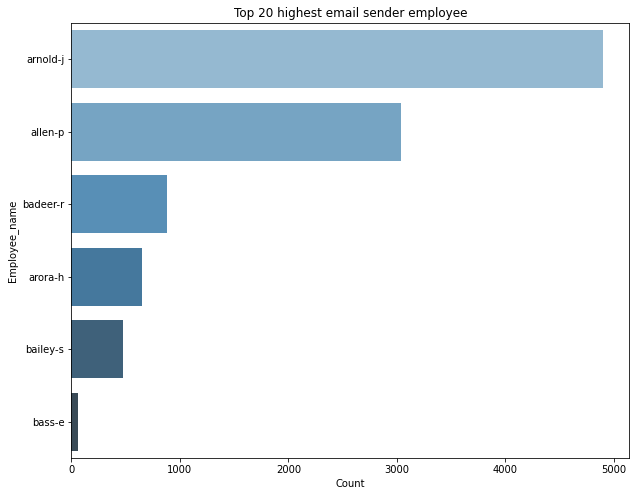

In [62]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

## Data Cleaning and Transformation

**date : column**

In [68]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [69]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)


TypeError: ignored

**Column : X-Folder**

In [21]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Notes inbox


'Notes inbox'

In [22]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,notes inbox,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,sent items,"Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam


In [23]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  1202


array(['notes inbox', 'sent items', 'deleted items', 'all documents',
       'discussion threads', "'sent mail", 'sent', 'alaska gas', 'inbox',
       'shopping', 'miscellaneous', 'wilson, shona', 'calendar',
       'old messages', 'move', 'corp info_announcements', 'untitled',
       'eesirenewableenergy', 'new york', 'brazos'], dtype=object)

**Replace empty missing values in subject with np.nan**

In [24]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [25]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [26]:
df.isnull().sum()

Unnamed: 0    0
Unnamed       0
file          0
message       0
date          0
subject       0
X-Folder      0
X-From        0
X-To          0
body          0
employee      0
label         0
dtype: int64

In [27]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

Series([], dtype: float64)

In [ ]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [28]:
df.isnull().sum(), df.shape

(Unnamed: 0    0
 Unnamed       0
 file          0
 message       0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 label         0
 dtype: int64, (94592, 12))

In [67]:
from sklearn import preprocessing
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
le = preprocessing.LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject'])
df['X-From_encoded'] = le.fit_transform(df['X-From'])
tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100

for i in range (0,99):
  X_train, X_test, Y_train, Y_test = train_test_split(df[['weekday', 'subject_encoded', 'X-From_encoded']], df['label'], test_size=.2)
  clf = DecisionTreeClassifier(max_depth=7).fit(X_train, Y_train)
  y_tree_pred = clf.predict(X_test)
  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Depths:\n", pd.Series(leaves_of_tree).describe())

#All features seems to have a mean accuracy of .95 with a standard deviation of .002 using max depth of 5 (default for this project)
#With a depth of 2, the accuracy drops to .91 and the std stays the same
#With a depth of 7, the accuracy goes up to .98 and the std goes down to .001
#Having only weekday and X-From_encoded keeps the same accuracy but lowers the std to .0009
#Having just weekday and hour drops the accuracy and std to when I had only a depth of 2
#Having weekday and subject_encoded is the same as previous
#Having weekday, subject_encoded, and X-From_encoded has .98 accuracy but has the lowest std at .0008, I think this is one of the best models

ValueError: ignored